## Imports

In [1]:
import pandas as pd
import requests
import os
import datetime
import gzip
import shutil
from pprint import pprint
import numpy as np
from tqdm import tqdm, tqdm_pandas
#sql alchemy
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session
from sqlalchemy.orm import declarative_base
from sqlalchemy.orm import column_property
from sqlalchemy import Column, Integer, Float, String
from sqlalchemy import insert, select

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy.stats import t, shapiro
#from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
#pour normaliser les données
from sklearn.preprocessing import StandardScaler

# GESTION DES DOSSIERS

## Creation du dossier raw contenant les données brutes

In [3]:
#Création du dossier raw pour les donnée brutes
path= (r"C:\Users\Simplon\immo")
os.makedirs(path, exist_ok=True)

# DOWNLOAD STEPS

## Téléchargement du fichier compressé (gz)

In [4]:
##### Déclaration de l'url pour 2021
url="https://files.data.gouv.fr/geo-dvf/latest/csv/2021/departements/"

while True:
    url_test = requests.get(url+"/44.csv.gz", stream=True)
    if url_test.status_code==200:  #test reponse du serveur
        print("Téléchargement en cours.")
        with requests.get(url+"/44.csv.gz", stream=True) as r:
            with open(path+"/44_appart.csv.gz", "wb") as f:
                shutil.copyfileobj(r.raw, f) #Enregistrement du fichier (méthode + rapide)
        print("Téléchargement terminé.")
        break

Téléchargement en cours.
Téléchargement terminé.


## Décompression du fichier

In [5]:
#Décompression du fichier et gestion d'erreur
while True:
    try:
        print("Décompression du fichier.")
        with gzip.open(path+"/44_appart.csv.gz", 'rb') as f_in:
            with open(path+"/44_appart.csv", 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
        print("Décompression terminée.")
        break
    except:
        print("Erreur lors de la décompression.")
        print("Le fichier est peut être manquant ou corrompus.")
        print("Contactez le noob de la maintenance!")
        break

Décompression du fichier.
Décompression terminée.


# TRANSFORM STEP

In [6]:
#Création du df
df=pd.read_csv(path+"/44_appart.csv")

C:\Users\Simplon\AppData\Local\Temp\ipykernel_10388\3398129266.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path+"/44_appart.csv")


## Général

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103235 entries, 0 to 103234
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id_mutation                   103235 non-null  object 
 1   date_mutation                 103235 non-null  object 
 2   numero_disposition            103235 non-null  int64  
 3   nature_mutation               103235 non-null  object 
 4   valeur_fonciere               102496 non-null  float64
 5   adresse_numero                68126 non-null   float64
 6   adresse_suffixe               4434 non-null    object 
 7   adresse_nom_voie              101810 non-null  object 
 8   adresse_code_voie             101817 non-null  object 
 9   code_postal                   101811 non-null  float64
 10  code_commune                  103235 non-null  int64  
 11  nom_commune                   103235 non-null  object 
 12  code_departement              103235 non-nul

In [8]:
#Voir le nombre de lignes du df
len(df['id_mutation'])-len(df['id_mutation'].unique())

59053

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103235 entries, 0 to 103234
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id_mutation                   103235 non-null  object 
 1   date_mutation                 103235 non-null  object 
 2   numero_disposition            103235 non-null  int64  
 3   nature_mutation               103235 non-null  object 
 4   valeur_fonciere               102496 non-null  float64
 5   adresse_numero                68126 non-null   float64
 6   adresse_suffixe               4434 non-null    object 
 7   adresse_nom_voie              101810 non-null  object 
 8   adresse_code_voie             101817 non-null  object 
 9   code_postal                   101811 non-null  float64
 10  code_commune                  103235 non-null  int64  
 11  nom_commune                   103235 non-null  object 
 12  code_departement              103235 non-nul

In [10]:
df.nombre_lots

0         1
1         2
2         0
3         1
4         1
         ..
103230    0
103231    0
103232    0
103233    0
103234    0
Name: nombre_lots, Length: 103235, dtype: int64

## Valeur_fonciere

In [11]:
#Drop des lignes valeur_foncière nulles
df.dropna(subset=['valeur_fonciere'], inplace=True)

In [12]:
df['valeur_fonciere']=df['valeur_fonciere'].astype(int)

## Adresse

In [13]:
#adresse_numero
df['adresse_numero']=df['adresse_numero'][df['adresse_numero'].notnull()].astype(int).astype(str)
#adresse_nom_voie
df['code_postal']=df['code_postal'][df['code_postal'].notnull()].astype(int).astype(str)

In [14]:
#Format adresse_nom_voie
df['adresse_nom_voie']=df['adresse_nom_voie'].str.title()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102496 entries, 0 to 103234
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id_mutation                   102496 non-null  object 
 1   date_mutation                 102496 non-null  object 
 2   numero_disposition            102496 non-null  int64  
 3   nature_mutation               102496 non-null  object 
 4   valeur_fonciere               102496 non-null  int32  
 5   adresse_numero                67962 non-null   object 
 6   adresse_suffixe               4418 non-null    object 
 7   adresse_nom_voie              101071 non-null  object 
 8   adresse_code_voie             101078 non-null  object 
 9   code_postal                   101072 non-null  object 
 10  code_commune                  102496 non-null  int64  
 11  nom_commune                   102496 non-null  object 
 12  code_departement              102496 non-nul

In [16]:
df.nombre_pieces_principales[df.nombre_pieces_principales.notnull()].astype(int)
df.surface_reelle_bati[df.surface_reelle_bati.notnull()].astype(int)
df.code_postal[df.code_postal.notnull()].astype(int)
df.code_type_local[df.code_type_local.notnull()].astype(int)
df.code_postal[df.code_postal.notnull()].astype(int)
df.code_commune[df.code_commune.notnull()].astype(int)
df.lot1_surface_carrez[df.lot1_surface_carrez.notnull()].astype(int)
df.lot2_surface_carrez[df.lot2_surface_carrez.notnull()].astype(int)
df.lot3_surface_carrez[df.lot3_surface_carrez.notnull()].astype(int)
df.lot4_surface_carrez[df.lot4_surface_carrez.notnull()].astype(int)
df.lot5_surface_carrez[df.lot5_surface_carrez.notnull()].astype(int)
df.surface_terrain[df.surface_terrain.notnull()].astype(int)
df.longitude[df.longitude.notnull()].astype(int)
df.latitude[df.latitude.notnull()].astype(int)

0         47
1         47
2         47
3         47
4         47
          ..
103230    47
103231    47
103232    47
103233    47
103234    47
Name: latitude, Length: 101200, dtype: int32

In [17]:
#Df appartement
df = df.drop(df[df.type_local!='Appartement'].index)

In [18]:
df

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
1,2021-513940,2021-01-05,1,Vente,130000,10,NaN,Rue Richer,7308,44100,...,Appartement,45.0,1.0,NaN,NaN,NaN,NaN,NaN,-1.576574,47.212731
3,2021-513942,2021-01-05,1,Vente,354240,48,B,Rue De Coulmiers,2244,44000,...,Appartement,74.0,3.0,NaN,NaN,NaN,NaN,NaN,-1.536938,47.222669
7,2021-513945,2021-01-04,1,Vente,133000,19,B,Rue Leon Jost,4912,44300,...,Appartement,36.0,2.0,NaN,NaN,NaN,NaN,NaN,-1.565577,47.237053
9,2021-513947,2021-01-08,1,Vente,240000,11,NaN,Rue Francis Merlant,3288,44000,...,Appartement,48.0,2.0,NaN,NaN,NaN,NaN,NaN,-1.575123,47.221564
12,2021-513948,2021-01-05,1,Vente,340650,162,NaN,Rue Paul Bellamy,6200,44000,...,Appartement,70.0,4.0,NaN,NaN,NaN,NaN,NaN,-1.562694,47.230031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103123,2021-558071,2021-04-26,1,Vente,389500,8,NaN,Rue Alexandre Jenvret,0040,44170,...,Appartement,30.0,2.0,S,sols,NaN,NaN,230.0,-1.625743,47.565327
103124,2021-558071,2021-04-26,1,Vente,389500,8,NaN,Rue Alexandre Jenvret,0040,44170,...,Appartement,36.0,1.0,S,sols,NaN,NaN,230.0,-1.625743,47.565327
103125,2021-558071,2021-04-26,1,Vente,389500,8,NaN,Rue Alexandre Jenvret,0040,44170,...,Appartement,42.0,2.0,S,sols,NaN,NaN,230.0,-1.625743,47.565327
103126,2021-558071,2021-04-26,1,Vente,389500,8,NaN,Rue Alexandre Jenvret,0040,44170,...,Appartement,32.0,2.0,S,sols,NaN,NaN,230.0,-1.625743,47.565327


In [19]:
df["SomCarrez"]=df.fillna(0)['lot1_surface_carrez'] + df.fillna(0)['lot2_surface_carrez'] + df.fillna(0)['lot3_surface_carrez'] + df.fillna(0)['lot4_surface_carrez'] + df.fillna(0)['lot5_surface_carrez']

In [20]:
df

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,SomCarrez
1,2021-513940,2021-01-05,1,Vente,130000,10,NaN,Rue Richer,7308,44100,...,45.0,1.0,NaN,NaN,NaN,NaN,NaN,-1.576574,47.212731,29.19
3,2021-513942,2021-01-05,1,Vente,354240,48,B,Rue De Coulmiers,2244,44000,...,74.0,3.0,NaN,NaN,NaN,NaN,NaN,-1.536938,47.222669,74.38
7,2021-513945,2021-01-04,1,Vente,133000,19,B,Rue Leon Jost,4912,44300,...,36.0,2.0,NaN,NaN,NaN,NaN,NaN,-1.565577,47.237053,36.02
9,2021-513947,2021-01-08,1,Vente,240000,11,NaN,Rue Francis Merlant,3288,44000,...,48.0,2.0,NaN,NaN,NaN,NaN,NaN,-1.575123,47.221564,49.81
12,2021-513948,2021-01-05,1,Vente,340650,162,NaN,Rue Paul Bellamy,6200,44000,...,70.0,4.0,NaN,NaN,NaN,NaN,NaN,-1.562694,47.230031,86.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103123,2021-558071,2021-04-26,1,Vente,389500,8,NaN,Rue Alexandre Jenvret,0040,44170,...,30.0,2.0,S,sols,NaN,NaN,230.0,-1.625743,47.565327,0.00
103124,2021-558071,2021-04-26,1,Vente,389500,8,NaN,Rue Alexandre Jenvret,0040,44170,...,36.0,1.0,S,sols,NaN,NaN,230.0,-1.625743,47.565327,0.00
103125,2021-558071,2021-04-26,1,Vente,389500,8,NaN,Rue Alexandre Jenvret,0040,44170,...,42.0,2.0,S,sols,NaN,NaN,230.0,-1.625743,47.565327,0.00
103126,2021-558071,2021-04-26,1,Vente,389500,8,NaN,Rue Alexandre Jenvret,0040,44170,...,32.0,2.0,S,sols,NaN,NaN,230.0,-1.625743,47.565327,0.00


In [21]:
#Mettre lot1_surface_carrez au ² pour avoir les bons calculs
df['SomCarrez']

1         29.19
3         74.38
7         36.02
9         49.81
12        86.96
          ...  
103123     0.00
103124     0.00
103125     0.00
103126     0.00
103149    41.75
Name: SomCarrez, Length: 11870, dtype: float64

In [22]:
df

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,SomCarrez
1,2021-513940,2021-01-05,1,Vente,130000,10,NaN,Rue Richer,7308,44100,...,45.0,1.0,NaN,NaN,NaN,NaN,NaN,-1.576574,47.212731,29.19
3,2021-513942,2021-01-05,1,Vente,354240,48,B,Rue De Coulmiers,2244,44000,...,74.0,3.0,NaN,NaN,NaN,NaN,NaN,-1.536938,47.222669,74.38
7,2021-513945,2021-01-04,1,Vente,133000,19,B,Rue Leon Jost,4912,44300,...,36.0,2.0,NaN,NaN,NaN,NaN,NaN,-1.565577,47.237053,36.02
9,2021-513947,2021-01-08,1,Vente,240000,11,NaN,Rue Francis Merlant,3288,44000,...,48.0,2.0,NaN,NaN,NaN,NaN,NaN,-1.575123,47.221564,49.81
12,2021-513948,2021-01-05,1,Vente,340650,162,NaN,Rue Paul Bellamy,6200,44000,...,70.0,4.0,NaN,NaN,NaN,NaN,NaN,-1.562694,47.230031,86.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103123,2021-558071,2021-04-26,1,Vente,389500,8,NaN,Rue Alexandre Jenvret,0040,44170,...,30.0,2.0,S,sols,NaN,NaN,230.0,-1.625743,47.565327,0.00
103124,2021-558071,2021-04-26,1,Vente,389500,8,NaN,Rue Alexandre Jenvret,0040,44170,...,36.0,1.0,S,sols,NaN,NaN,230.0,-1.625743,47.565327,0.00
103125,2021-558071,2021-04-26,1,Vente,389500,8,NaN,Rue Alexandre Jenvret,0040,44170,...,42.0,2.0,S,sols,NaN,NaN,230.0,-1.625743,47.565327,0.00
103126,2021-558071,2021-04-26,1,Vente,389500,8,NaN,Rue Alexandre Jenvret,0040,44170,...,32.0,2.0,S,sols,NaN,NaN,230.0,-1.625743,47.565327,0.00


In [23]:
filter=(df['type_local']=='Appartement') & ((df['SomCarrez']> 0)&(df['SomCarrez']<1000))
df_appartement=df[filter]
df_appartement.dropna(subset=['latitude', 'longitude', 'SomCarrez'], inplace=True)

C:\Users\Simplon\AppData\Local\Temp\ipykernel_10388\1547920072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_appartement.dropna(subset=['latitude', 'longitude', 'SomCarrez'], inplace=True)


In [24]:
df_appartement

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,SomCarrez
1,2021-513940,2021-01-05,1,Vente,130000,10,NaN,Rue Richer,7308,44100,...,45.0,1.0,NaN,NaN,NaN,NaN,NaN,-1.576574,47.212731,29.19
3,2021-513942,2021-01-05,1,Vente,354240,48,B,Rue De Coulmiers,2244,44000,...,74.0,3.0,NaN,NaN,NaN,NaN,NaN,-1.536938,47.222669,74.38
7,2021-513945,2021-01-04,1,Vente,133000,19,B,Rue Leon Jost,4912,44300,...,36.0,2.0,NaN,NaN,NaN,NaN,NaN,-1.565577,47.237053,36.02
9,2021-513947,2021-01-08,1,Vente,240000,11,NaN,Rue Francis Merlant,3288,44000,...,48.0,2.0,NaN,NaN,NaN,NaN,NaN,-1.575123,47.221564,49.81
12,2021-513948,2021-01-05,1,Vente,340650,162,NaN,Rue Paul Bellamy,6200,44000,...,70.0,4.0,NaN,NaN,NaN,NaN,NaN,-1.562694,47.230031,86.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102520,2021-557811,2021-02-26,1,Vente,115000,3,NaN,Rue Maurice Utrillo,0955,44110,...,66.0,3.0,NaN,NaN,NaN,NaN,NaN,-1.377827,47.728697,66.90
102652,2021-557872,2021-03-10,1,Vente,118000,19,B,Rue Du Pelican,1110,44110,...,72.0,4.0,NaN,NaN,NaN,NaN,NaN,-1.375440,47.718593,72.44
102813,2021-557938,2021-03-11,1,Vente,54970,31,NaN,Rue Des Vingt Sept Otages,1600,44110,...,27.0,2.0,NaN,NaN,NaN,NaN,NaN,-1.366519,47.719067,27.61
102873,2021-557972,2021-03-24,1,Vente,50000,5,NaN,Rue Des Quatre Oeufs,1230,44110,...,42.0,1.0,NaN,NaN,NaN,NaN,NaN,-1.376418,47.719000,39.02


In [25]:
df['surface_terrain']=df.fillna(0)['surface_terrain']

In [26]:
#Normaliser les datas numériques :
colonnes = ['valeur_fonciere','nombre_pieces_principales','surface_reelle_bati','surface_terrain','SomCarrez']
copie = df.copy()
df_scaled = copie[colonnes]

df_scaled = df_scaled.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

In [27]:
df_scaled

,valeur_fonciere,nombre_pieces_principales,surface_reelle_bati,surface_terrain,SomCarrez
1,-0.234431,-1.345666,-0.404760,-0.188937,-0.220426
3,0.032307,0.415518,0.704983,-0.188937,1.050730
7,-0.230863,-0.465074,-0.749163,-0.188937,-0.028304
9,-0.103584,-0.465074,-0.289959,-0.188937,0.359596
12,0.016141,1.296110,0.551915,-0.188937,1.404594
...,...,...,...,...,...
103123,0.074249,-0.465074,-0.978765,0.185042,-1.041516
103124,0.074249,-1.345666,-0.749163,0.185042,-1.041516
103125,0.074249,-0.465074,-0.519561,0.185042,-1.041516
103126,0.074249,-0.465074,-0.902231,0.185042,-1.041516


In [28]:
#Rename les colonnes du df_scaled pour pouvoir les ajouter au df
df_scaled = df_scaled.rename(columns = {'valeur_fonciere' : 'val_fonc_norm',
                 'nombre_pieces_principales' : 'nbr_pieces_princ_norm',
                 'surface_reelle_bati' : 'surf_reel_bat_norm',
                 'surface_terrain' : 'surf_terrain_norm',
                 'SomCarrez' : 'SomCarrez_norm'})

In [29]:
#Concaténation des deux df
df = pd.concat([df, df_scaled], axis = 1)

In [30]:
#Vérification
df

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,nature_culture_speciale,surface_terrain,longitude,latitude,SomCarrez,val_fonc_norm,nbr_pieces_princ_norm,surf_reel_bat_norm,surf_terrain_norm,SomCarrez_norm
1,2021-513940,2021-01-05,1,Vente,130000,10,NaN,Rue Richer,7308,44100,...,NaN,0.0,-1.576574,47.212731,29.19,-0.234431,-1.345666,-0.404760,-0.188937,-0.220426
3,2021-513942,2021-01-05,1,Vente,354240,48,B,Rue De Coulmiers,2244,44000,...,NaN,0.0,-1.536938,47.222669,74.38,0.032307,0.415518,0.704983,-0.188937,1.050730
7,2021-513945,2021-01-04,1,Vente,133000,19,B,Rue Leon Jost,4912,44300,...,NaN,0.0,-1.565577,47.237053,36.02,-0.230863,-0.465074,-0.749163,-0.188937,-0.028304
9,2021-513947,2021-01-08,1,Vente,240000,11,NaN,Rue Francis Merlant,3288,44000,...,NaN,0.0,-1.575123,47.221564,49.81,-0.103584,-0.465074,-0.289959,-0.188937,0.359596
12,2021-513948,2021-01-05,1,Vente,340650,162,NaN,Rue Paul Bellamy,6200,44000,...,NaN,0.0,-1.562694,47.230031,86.96,0.016141,1.296110,0.551915,-0.188937,1.404594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103123,2021-558071,2021-04-26,1,Vente,389500,8,NaN,Rue Alexandre Jenvret,0040,44170,...,NaN,230.0,-1.625743,47.565327,0.00,0.074249,-0.465074,-0.978765,0.185042,-1.041516
103124,2021-558071,2021-04-26,1,Vente,389500,8,NaN,Rue Alexandre Jenvret,0040,44170,...,NaN,230.0,-1.625743,47.565327,0.00,0.074249,-1.345666,-0.749163,0.185042,-1.041516
103125,2021-558071,2021-04-26,1,Vente,389500,8,NaN,Rue Alexandre Jenvret,0040,44170,...,NaN,230.0,-1.625743,47.565327,0.00,0.074249,-0.465074,-0.519561,0.185042,-1.041516
103126,2021-558071,2021-04-26,1,Vente,389500,8,NaN,Rue Alexandre Jenvret,0040,44170,...,NaN,230.0,-1.625743,47.565327,0.00,0.074249,-0.465074,-0.902231,0.185042,-1.041516


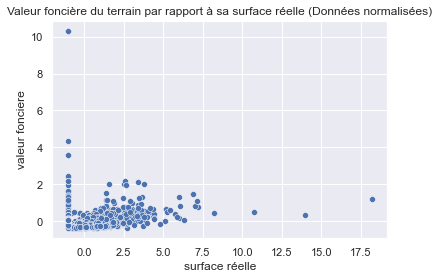

In [31]:
#Valeur foncière par rapport à la surface carré(²) (Données normalisées)
sns.set()

ax = sns.scatterplot(x="SomCarrez_norm", y="val_fonc_norm", data=df_scaled)
ax.set(xlabel='surface réelle', ylabel='valeur fonciere')
ax.set(title='Valeur foncière du terrain par rapport à sa surface réelle (Données normalisées)')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

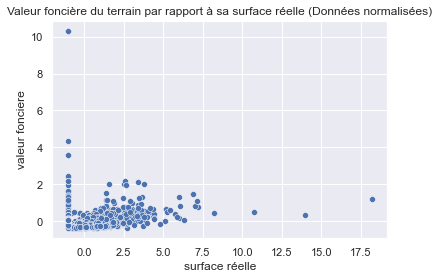

In [32]:
#Valeur foncière du terrain par rapport à sa surface (Données normalisées)
sns.set()

ax = sns.scatterplot(x="SomCarrez_norm", y="val_fonc_norm", data=df_scaled)
ax.set(xlabel='surface réelle', ylabel='valeur fonciere')
ax.set(title='Valeur foncière du terrain par rapport à sa surface réelle (Données normalisées)')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

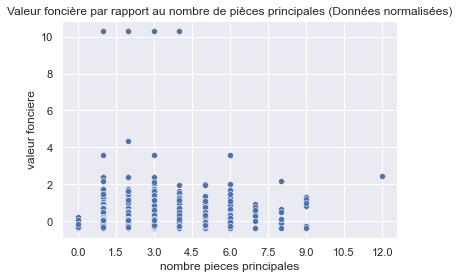

In [33]:
#Valeur foncière par rapport au nombre de pièces principales (Données normalisées)
sns.set()

ax = sns.scatterplot(x="nombre_pieces_principales", y="val_fonc_norm", data=df)
ax.set(xlabel='nombre pieces principales', ylabel='valeur fonciere')
ax.set(title='Valeur foncière par rapport au nombre de pièces principales (Données normalisées)')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

In [34]:
#Test
import pandas
import sklearn
from sklearn.model_selection import train_test_split

y = df.valeur_fonciere
X = df [[  
        
        'code_commune', 
       'SomCarrez',
        'nombre_lots', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
        'nature_culture', 'surface_terrain', 'longitude',
       'latitude']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [35]:
#Regarder régression linaire
reg_multi = smf.ols('val_fonc_norm~ SomCarrez_norm\
                    +surf_reel_bat_norm+nombre_pieces_principales+surf_terrain_norm', data=df).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:          val_fonc_norm   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     3034.
Date:                Mon, 25 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:08:11   Log-Likelihood:                -12662.
No. Observations:               11870   AIC:                         2.533e+04
Df Residuals:                   11865   BIC:                         2.537e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

a_prevoir = pd.DataFrame({'nombre_pieces_principales' : 10 , 'SomCarrez_norm' :283  , 'surf_reel_bat_norm' : 2873}, index=[0])
prev = reg_multi.predict(a_prevoir)
print(round(prev[0], 2))

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'surf_terrain_norm' is not defined
    val_fonc_norm~ SomCarrez_norm                    +surf_reel_bat_norm+nombre_pieces_principales+surf_terrain_norm
                                                                                                   ^^^^^^^^^^^^^^^^^